In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read the data from the URL
url = "https://cos.drbrain.net/profile/tj/2023/3/29/0626dfee-6bdd-4b48-af3e-d6545094d1d6.txt"
df = pd.read_csv(url, index_col=0)


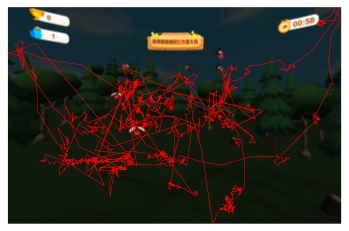

In [71]:
img = plt.imread('src/fire_fly_bg.png')
x, y = df['x'], df['y']
# plt.imshow(img, extent=[-960, 960, -540, 540])
plt.imshow(img, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
plt.plot(x, y, color="red", linewidth=0.5)
plt.axis('off')
# plt.xlim(-960, 960)
# plt.ylim(-540, 540)
plt.show()

(-891.6137, 934.0721, -491.9726, 468.5849)

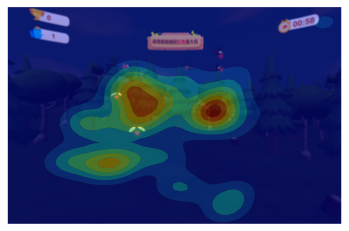

In [68]:
from scipy.stats.kde import gaussian_kde

x, y = df['x'], df['y']
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.4, cmap='jet')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
im = plt.imread('src/fire_fly_bg.png')
plt.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
plt.axis('off')

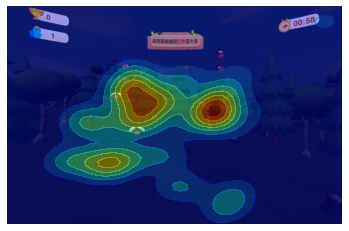

In [3]:
import Firefly

f = Firefly.Firefly(df, '.')
f.plot()

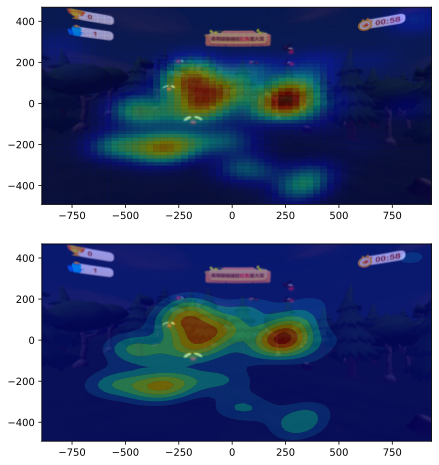

In [63]:
from scipy.stats.kde import gaussian_kde

x, y = df['x'], df['y']
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# multiply density values by a factor to adjust transparency
zi_norm = zi / zi.max() * 0.5

fig = plt.figure(figsize=(7,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
m1 = ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.4, cmap='jet')
m2 = ax2.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.4, cmap='jet')

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

# you can also overlay your soccer field
im = plt.imread('src/fire_fly_bg.png')
ax1.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
ax2.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
